## Data Preparation

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import csv

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# performance metrics
from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv(r"C:\Users\PC\Documents\After  School\Project\Project Main Box\Conflict Prediction system\Data\Africa_1997-2025_Feb28.csv")

#### Understanding the Data Check dataset structure (columns, data types, and few rows).

In [3]:
# Preview a few entries
df.iloc[1000:1010]

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
1000,SUD33788,2025-02-19,2025,1,Strategic developments,Strategic developments,Other,Government of Sudan (2019-),NaN,State forces,...,Port Sudan,19.6148,37.2225,1,Al Rakoba News; Al Sudani; Alhamish Voice; Sud...,National,"Other: On 19 February 2025, Sudan government a...",0,NaN,1740447649
1001,SUD33789,2025-02-19,2025,1,Political violence,Battles,Armed clash,Rapid Support Forces,Darfur Arab Militia (Sudan),Rebel group,...,El Fasher,13.6264,25.3559,1,Al Mashhad Al Sudani; Al Rakoba News; Sudan Ne...,New media-National,"On 19 February 2025, clashes between RSF, back...",11,NaN,1740447649
1002,SUD33790,2025-02-19,2025,2,Strategic developments,Strategic developments,Change to group/activity,Rapid Support Forces,NaN,Rebel group,...,Saraf Omra,13.4771,23.3117,2,Sudan News Agency,National,Movement of forces: Around 19 February 2025 (a...,0,NaN,1740447649
1003,SUD33791,2025-02-19,2025,2,Strategic developments,Strategic developments,Looting/property destruction,Darfur Communal Militia (Sudan),NaN,Identity militia,...,Ed Daein,11.4619,26.1258,1,Darfur 24,Subnational,Looting: Around 19 February 2025 (as reported)...,0,NaN,1740447649
1004,SUD33792,2025-02-19,2025,1,Political violence,Battles,Armed clash,Military Forces of Sudan (2019-),NaN,State forces,...,Al Gitaina,14.8648,32.3668,2,Twitter,New media,"On 19 February 2025, clashes between SAF and R...",0,NaN,1740447649
1005,SUD33793,2025-02-19,2025,1,Political violence,Battles,Government regains territory,Military Forces of Sudan (2019-),NaN,State forces,...,Abu Al Gir,13.0012,30.4587,1,Twitter,New media,"On 19 February 2025, clashes between SAF and R...",0,NaN,1740447649
1006,SUD33794,2025-02-19,2025,1,Political violence,Battles,Government regains territory,Military Forces of Sudan (2019-),NaN,State forces,...,Jebel Dair,12.4411,30.6500,1,Twitter,New media,"On 19 February 2025, clashes between SAF and R...",0,NaN,1740447649
1007,SUD33795,2025-02-19,2025,1,Political violence,Battles,Government regains territory,Military Forces of Sudan (2019-),NaN,State forces,...,Sidrah,12.4503,30.7493,1,Twitter,New media,"On 19 February 2025, clashes between SAF and R...",0,NaN,1740447649
1008,SUD33796,2025-02-19,2025,1,Political violence,Battles,Government regains territory,Military Forces of Sudan (2019-),NaN,State forces,...,Al Ayin,12.3860,30.6155,1,Twitter,New media,"On 19 February 2025, clashes between SAF and R...",0,NaN,1740447649
1009,SUD33797,2025-02-19,2025,1,Political violence,Violence against civilians,Attack,Military Forces of Sudan (2019-),NaN,State forces,...,El Rahad,12.7243,30.6391,1,Sudan War Monitor,National,"On 19 February 2025, SAF attacked civilians in...",1,NaN,1740447649


In [4]:
# checking the shape of the dataset
print(f"This dataset contains {df.shape[0]} rows and {df.shape[1]} columns\n")
print(f"This are the columns available in the dataset {df.columns} columns")

This dataset contains 413947 rows and 31 columns

This are the columns available in the dataset Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object') columns


In [5]:
# check statistics
df.describe()

,year,time_precision,iso,latitude,longitude,geo_precision,fatalities,timestamp
count,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,4.139470e+05
mean,2017.527964,1.130737,510.399988,6.922263,21.886800,1.279074,2.439153,1.676141e+09
std,6.608510,0.393477,250.075057,15.495063,16.776814,0.494604,24.320917,5.263689e+07
min,1997.000000,1.000000,12.000000,-34.706800,-25.163100,1.000000,0.000000,1.552576e+09
25%,2015.000000,1.000000,231.000000,0.315600,8.155500,1.000000,0.000000,1.622068e+09
50%,2020.000000,1.000000,566.000000,6.693600,28.043600,1.000000,0.000000,1.689711e+09
75%,2022.000000,1.000000,710.000000,13.515700,33.483300,2.000000,1.000000,1.724714e+09
max,2025.000000,3.000000,894.000000,37.281500,64.683200,3.000000,1350.000000,1.741072e+09


In [6]:
print(f"The shows more information about the dataset, that is the entries and data type per column\n")
df.info()

The shows more information about the dataset, that is the entries and data type per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413947 entries, 0 to 413946
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   event_id_cnty       413947 non-null  object 
 1   event_date          413947 non-null  object 
 2   year                413947 non-null  int64  
 3   time_precision      413947 non-null  int64  
 4   disorder_type       413947 non-null  object 
 5   event_type          413947 non-null  object 
 6   sub_event_type      413947 non-null  object 
 7   actor1              413947 non-null  object 
 8   assoc_actor_1       114747 non-null  object 
 9   inter1              413947 non-null  object 
 10  actor2              301956 non-null  object 
 11  assoc_actor_2       85527 non-null   object 
 12  inter2              301956 non-null  object 
 13  interaction         413947 non-null  objec

### Data Cleaning Plan
> 1. Dropping irrelevant data i.e columns that do not add value to the analysis
> 2. Handling Missing Data Fill or drop missing values based on relevance.
> 3. Removing Duplicates if any exist.
> 4. Detect and remove extreme values that could distort analysis that is remove outliers
> 5. Cleaning Text Data that is renaming columns and correct of typos

NB: for the missing values this is the criteria that will be used:
> * If a column has 0% missing values, no cleaning is needed.
> * If a column has less than 5% missing values, you can either drop the missing rows or fill them using mean/median/mode.
> * If a column has more than 50% missing values, it may be better to drop the column entirely.

#### The following columns will be dropped as they are irrelevant to our anlaysis

> * event_id_cnty – Unique identifier for events (not useful for prediction).
> * timestamp – A Unix timestamp; redundant with event_date.
> * notes – Descriptive text that is difficult to quantify for modeling.
> * source & source_scale – Identifies where the data was collected but may not contribute to predicting future conflict.
> * tags – Sparse data and may not be structured enough for modeling.
> * assoc_actor_1 & assoc_actor_2 – Frequently missing values; may not provide strong predictive power. yet it is backed up by actor
> * iso - The iso column represents the ISO country code, which is a numeric identifier for each country.
> * time_precision - The time_precision column indicates how precise the event date is, hence it less useful.

In [7]:
df.drop(columns=[
    'event_id_cnty',
    'time_precision',
    'assoc_actor_1',
    'assoc_actor_2',
    'iso',
    'source',
    'source_scale',
    'notes',
    'tags',
    'timestamp',
], inplace=True)
# preview the columns
df.columns

Index(['event_date', 'year', 'disorder_type', 'event_type', 'sub_event_type',
       'actor1', 'inter1', 'actor2', 'inter2', 'interaction',
       'civilian_targeting', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'fatalities'],
      dtype='object')

In [8]:
# checking missing values
df.isna().sum()

event_date                 0
year                       0
disorder_type              0
event_type                 0
sub_event_type             0
actor1                     0
inter1                     0
actor2                111991
inter2                111991
interaction                0
civilian_targeting    290800
region                     0
country                    0
admin1                    17
admin2                  3820
admin3                204055
location                   0
latitude                   0
longitude                  0
geo_precision              0
fatalities                 0
dtype: int64

#### plan to handle missing values

| Column  | Missing values  | Solution and reason                                  |
|---------|-----------------|------------------------------------------------------|
| actor2           | 111,991   | Fill with ***Unknown*** Some events may involve only one actor (e.g., protests, riots)         |
| inter2           | 111,991        | Fill with ***Unknown*** If actor2 is missing, inter2 (interaction type) is also unknown       |
| civilian_targeting | 290,800      | Fill with ***No*** Missing values likely mean civilians were not targeted             |
| admin1           | 17            | ***Drop rows*** only a few missing, so dropping won’t affect the dataset much      |
| admin2           | 3,820         | Fill with ***Unknown*** or mode District info missing, but "Unknown" preserves all events |
| admin3           | 204,055       | ***Drop column*** Too many missing values, making it unreliable for analysis                 |

In [9]:
# fill the rows with missing values
df[['actor2', 'inter2', 'admin2',]] = df[['actor2', 'inter2', 'admin2',]].fillna("Unknown")
df[['civilian_targeting']] = df[['civilian_targeting']].fillna("No")

In [10]:
"""
The civilian_targeting has two entries NO and civilian_targeting, for a better readibility
replacing civilian_targeting with yes will be the enhance the readability of this column
"""
# replace civilian_targeting with Yes
df['civilian_targeting'] = df['civilian_targeting'].replace({'Civilian targeting': 'Yes'})
# preview changes
df['civilian_targeting'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
# droping nan values and dropping column
df.dropna(subset=['admin1'], inplace=True)
# drop column
df.drop('admin3', axis=1, inplace=True)

In [12]:
# preview the missing values
print(f"The dataset contains {df.isna().sum().sum()} missing values")

The dataset contains 0 missing values


In [13]:
# checking for duplicates
print(f"The dataset contains {df.duplicated().sum()} duplicated rows")

The dataset contains 4291 duplicated rows


In [14]:
""" 
The dataset contain 4291 duplicated rows, to maintain data consistency while avoiding redundancy, 
we will keep only the first occurrence of each duplicate row and remove the rest
"""
# dropping duplicates while keeping first occurrence
df.drop_duplicates(keep="first", inplace=True)
# preview
print(f"The dataset contains {df.duplicated().sum()} duplicated rows")

The dataset contains 0 duplicated rows


#### Detecting and handling outliers

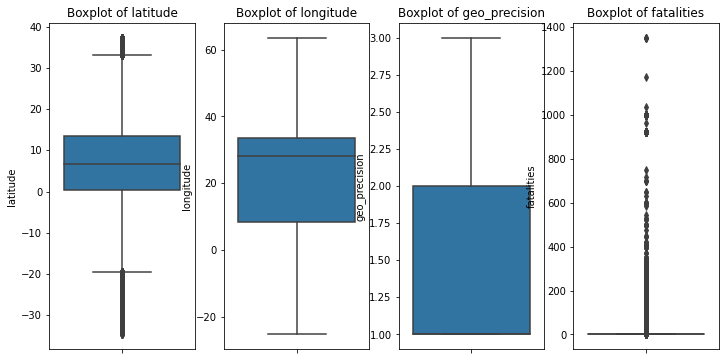

In [15]:
# Select numerical columns
num_cols = ['latitude', 'longitude', 'geo_precision', 'fatalities']
# Plot boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.show()

#### Outlier detection was conducted on numerical columns to identify potential extreme values. However, not all numerical columns require outlier removal.

> * Latitude & Longitude - It is a numerical column but it does not need outlier removal reason their extreme values do not necessarily indicate errors but rather represent real-world geographic locations, including conflict-prone areas. After checking for invalid coordinates none was found hence all data points were retained.
> * Geo Precision - is a numerical column that represents categorical levels of location accuracy for example, 1 = most precise, 3 = least precise and etc hence outlier detection does not apply here, so no modifications were made.
> * Fatalities is a numerical column where outlier detected alot of extreme numbers. In this case extreme numbers represent real conflict events rather than errors. Instead of removing these values as outliers, applying log transformation will help to reduce skewness while preserving valuable information.

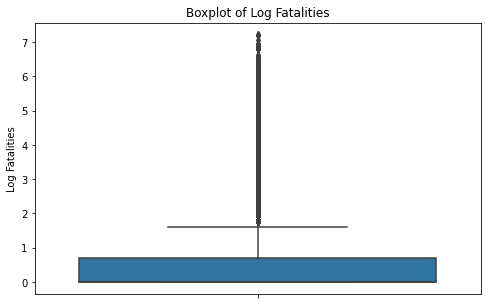

In [16]:
# Apply log transformation to fatalities
df['log_fatalities'] = np.log1p(df['fatalities'])
# preview viz
# Plot the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['log_fatalities'])
plt.title("Boxplot of Log Fatalities")
plt.ylabel("Log Fatalities")
plt.show()

The log transformation applied to fatalities to reduced skewness and the impact of extreme values, making the distribution more manageable. This helps prevent the model from being overly influenced by very high fatality counts while preserving meaningful patterns.

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [17]:
# for this anlayis we will copy our data and rename df to df1
df1 = df.copy()

In [18]:
# check the statistical distribution
df1.describe()

,year,latitude,longitude,geo_precision,fatalities,log_fatalities
count,409639.000000,409639.000000,409639.000000,409639.000000,409639.000000,409639.000000
mean,2017.536799,6.890543,21.953422,1.280125,2.451607,0.442752
std,6.597899,15.428663,16.737604,0.495193,24.246769,0.816696
min,1997.000000,-34.706800,-25.163100,1.000000,0.000000,0.000000
25%,2015.000000,0.315600,8.316700,1.000000,0.000000,0.000000
50%,2020.000000,6.667300,28.043600,1.000000,0.000000,0.000000
75%,2022.000000,13.484000,33.546000,2.000000,1.000000,0.693147
max,2025.000000,37.281500,63.475000,3.000000,1350.000000,7.208600


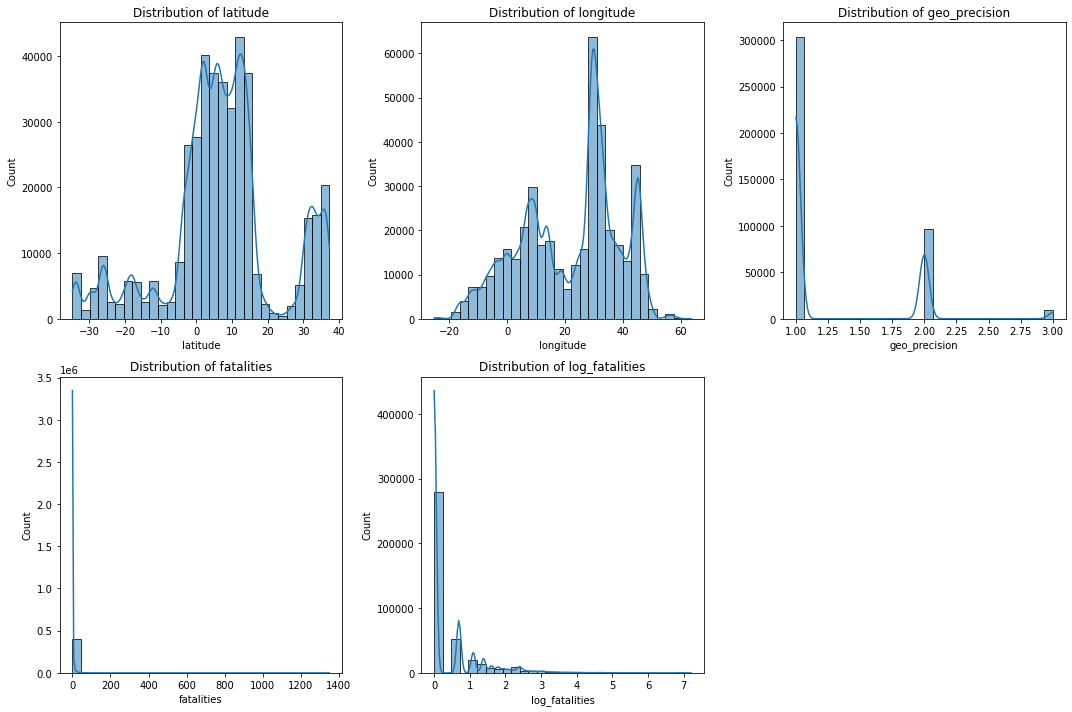

In [19]:
# Select numerical columns
num_cols = ['latitude', 'longitude', 'geo_precision', 'fatalities', 'log_fatalities']
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
# Plot histograms with KDE
for i, col in enumerate(num_cols):
    sns.histplot(df1[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
# Remove empty subplot if odd number of plots
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

#### Interpretation of Numerical Variable Distributions

> * The latitude distribution shows clustering around specific values, indicating conflicts are concentrated in certain regions rather than evenly spread. Some extreme values suggest conflicts occur across a broad range.
> * The longitude distribution has multiple peaks, suggesting conflicts occur in distinct regions rather than being uniformly distributed. This reinforces the idea of localized conflict zones.
> * The geo_precision distribution shows most events have high location accuracy (1), but some have lower precision (2,3), indicating location uncertainty in certain records.
> * The fatalities distribution is highly skewed, with most events having low fatalities and a few extreme cases. The log transformation compresses the scale, reducing the impact of extreme values while maintaining the trend.

#### Performing Univariate Analysis in Categorical columns, For redability we will split the columns as follows:

> * Event Characteristics - disorder_type, event_type, sub_event_type, civilian_targeting
> * Actors & Interactions - actor1, inter1, actor2, inter2, interaction
> * Geographic Distribution - region, country, admin1, admin2, location

#### Event Characteristics

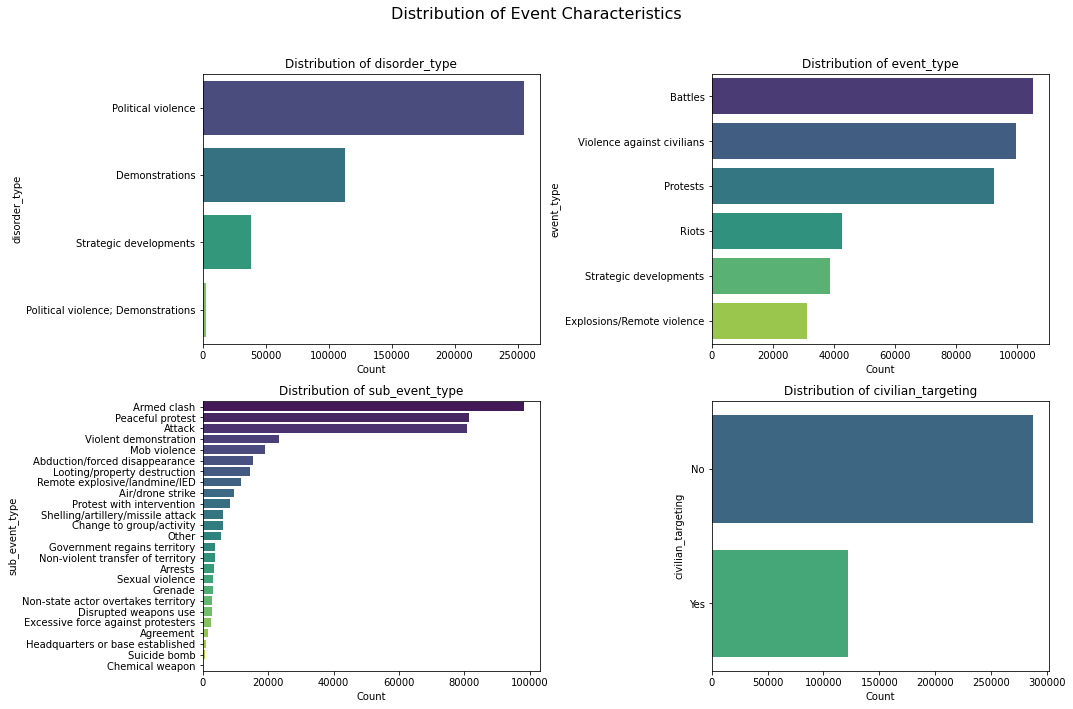

In [20]:
# Define the categorical columns to visualize
event_columns = ['disorder_type', 'event_type', 'sub_event_type', 'civilian_targeting']
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Event Characteristics', fontsize=16)
# Iterate through columns and plot
for ax, col in zip(axes.flatten(), event_columns):
    sns.countplot(y=df1[col], order=df1[col].value_counts().index, ax=ax, palette="viridis")
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('Count')
    ax.set_ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Event Characteristics Interpretation

> * Disorder Type - Political violence is the most dominant, followed by demonstrations. Strategic developments are less frequent.
> * Event Type - Battles and violence against civilians are the most common, highlighting armed conflicts and civilian attacks.
> * Sub-event Type - Armed clashes, peaceful protests, and attacks dominate, showing a mix of violent and non-violent actions.
> * Civilian Targeting - While most incidents don’t directly target civilians, a significant proportion still does.

#### Actors & Interactions

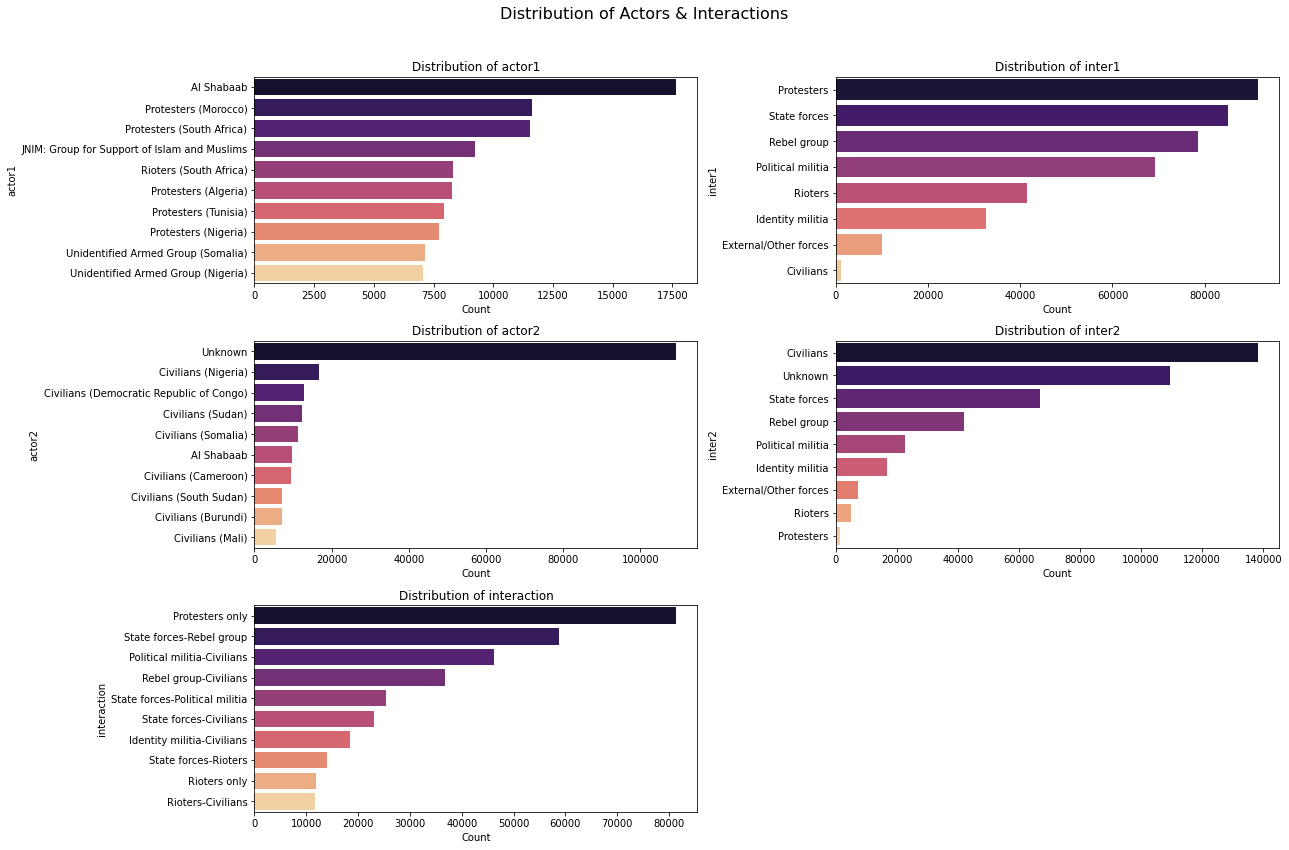

In [21]:
# Define the categorical columns to visualize
actor_columns = ['actor1', 'inter1', 'actor2', 'inter2', 'interaction']
# Set up the figure and axes dynamically based on the number of columns
num_plots = len(actor_columns)
rows = (num_plots // 2) + (num_plots % 2)  # Ensure enough rows
fig, axes = plt.subplots(rows, 2, figsize=(18, 12))

fig.suptitle('Distribution of Actors & Interactions', fontsize=16)
# Flatten axes only if there are multiple rows
if rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]  
# Iterate through columns and plot
for i, col in enumerate(actor_columns):
    sns.countplot(y=df1[col], order=df1[col].value_counts().index[:10], ax=axes[i], palette="magma")  # Top 10 categories
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove empty subplot

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Actors & Interactions Interpretation
> * Actor 1 - Al-Shabaab and protesters are the most frequently mentioned, indicating militant and civil movements.
> * Inter1 - Protesters, state forces, and rebel groups are the main interacting entities.
> * Actor 2 - Civilians are the most affected, with many attacks involving unidentified actors.
> * Inter2 - Civilians remain the most targeted group, followed by state forces and rebel groups.
> * Interaction - Protesters vs. state forces and rebel groups vs. state forces are the most common conflict dynamics.


Geographic Distribution

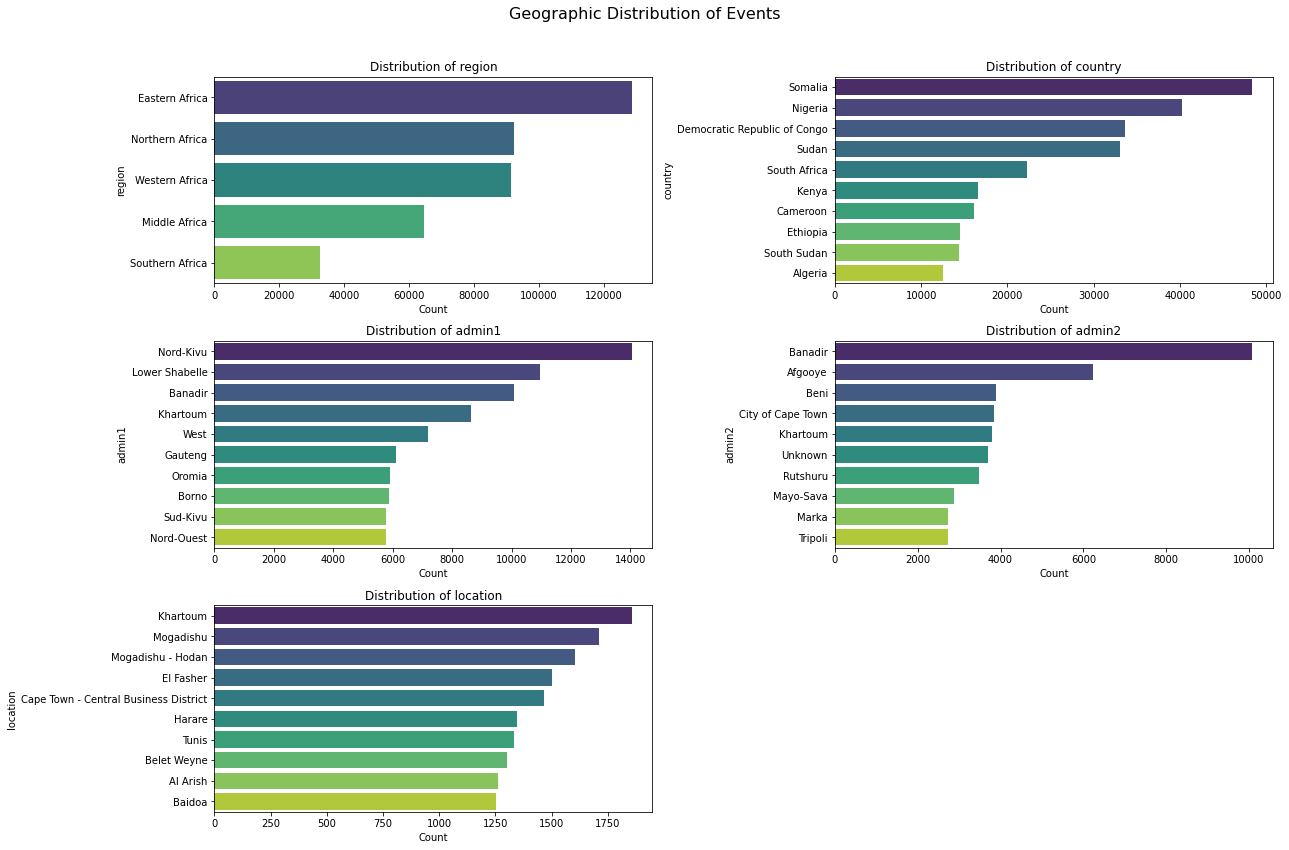

In [22]:
# Define geographic columns
geo_columns = ['region', 'country', 'admin1', 'admin2', 'location']
# Determine the number of required rows
num_plots = len(geo_columns)
rows = (num_plots // 2) + (num_plots % 2)
# Set up the figure and axes
fig, axes = plt.subplots(rows, 2, figsize=(18, 12))
fig.suptitle('Geographic Distribution of Events', fontsize=16)
# Flatten axes if multiple rows exist, otherwise make it a list
if rows > 1:
    axes = axes.flatten()
else:
    axes = [axes] 
# Plot each column
for i, col in enumerate(geo_columns):
    sns.countplot(y=df1[col], order=df1[col].value_counts().index[:10], ax=axes[i], palette="viridis")  
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete empty subplot

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Geographic Distribution Interpretation 
> * Region - Eastern Africa has the highest number of conflict events, followed by Northern and Western Africa.
> * Country - Somalia and Nigeria are the most affected, with ongoing insurgencies and civil unrest.
> * Admin1 - North Kivu, Lower Shabelle, and Banadir are key conflict hotspots.
> * Admin2 - Benadir and Afgooye report the highest number of incidents. 

### Bivariate Analysis Plan

> * Categorical vs. Categorical Analysis for example Relationship between event type and region, Use stacked bar plots or heatmaps to explore relationships between categorical variables.
> * Categorical vs. Numerical Analysis for example Fatalities per region, Use boxplots or violin plots to show distribution differences.
> * Numerical vs. Numerical Analysis for example Correlation between fatalities and event type, Use scatter plots and correlation matrices to check relationships between numerical features.
> * Geospatial Bivariate Analysis for example Fatalities per country or region over time, Use geospatial maps to overlay conflicts and fatalities.

#### Numerical vs. Numerical Analysis

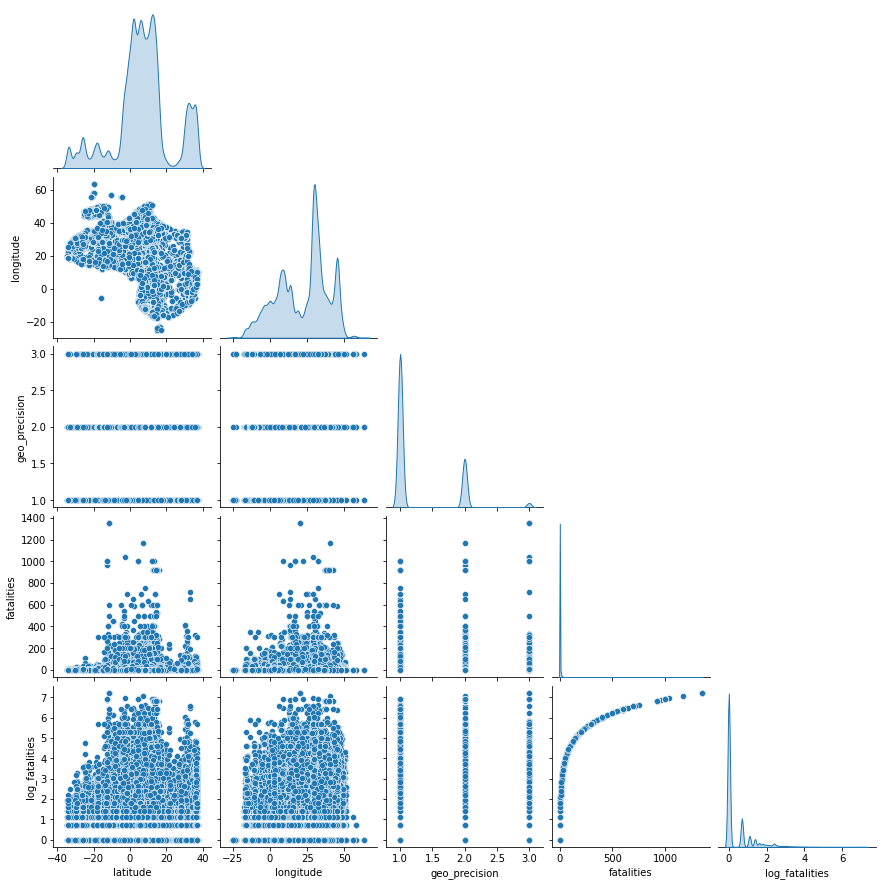

In [23]:
# Selecting numerical columns for pairplot
num_cols = ['latitude', 'longitude', 'geo_precision', 'fatalities', 'log_fatalities']

# Pairplot with KDE diagonal and corner=True to avoid duplicate plots
sns.pairplot(df1[num_cols], diag_kind='kde', corner=True)

# Show the plot
plt.show()


#### Interpretation of the Pairplot
> * Geospatial Distribution i.e. Latitude & Longitude, The scatter plots between latitude and longitude suggest distinct clusters, possibly representing regions with frequent conflict events. These clusters may align with high-risk conflict zones in Africa.
> * Geo-Precision vs. Other Variables, geo_precision is categorical (1, 2, or 3), limiting its numerical correlation. hence, It does not show a strong relationship with other variables, indicating location precision varies independently of fatalities or geography.
> * Fatalities vs. Log-Fatalities, fatalities is highly skewed, with a concentration of lower values and extreme outliers. but, The log transformation i.e. log_fatalities effectively normalizes this distribution, making patterns more discernible.
> * Fatalities vs. Geographical Variables, There’s no strong linear relationship between fatalities and location, though some regions may have higher conflict severity.


#### Numerical vs. Numerical Analysis

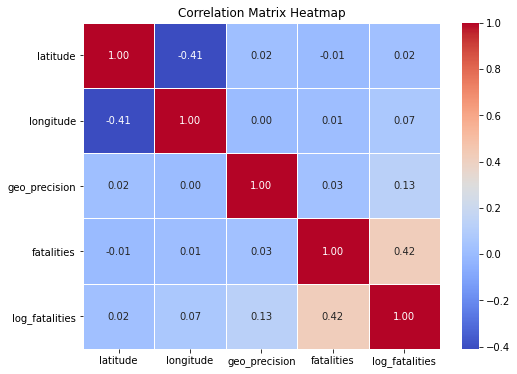

In [24]:
# Selecting numerical columns
numerical_cols = ['latitude', 'longitude', 'geo_precision', 'fatalities', 'log_fatalities']
# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Numerical vs. Numerical Analysis Interpretation:
> * There are no strong correlations in this dataset, except for the expected relationship between fatalities and log_fatalities. Other variables show minimal influence on each other, suggesting that conflict events are widely distributed across different locations with no dominant numerical pattern.

### Hypothesis Testing

#### Event Type vs. Fatalities (ANOVA)
> * Null Hypothesis (H₀): The average number of fatalities does not significantly differ across different event types.
> * Alternative Hypothesis (H₁): Some event types are associated with significantly higher or lower fatalities.

In [25]:
# Create a subset for this hypothesis test
df_hypothesis1 = df1[['event_type', 'log_fatalities']]
# Perform ANOVA test
event_groups = [group['log_fatalities'].values for _, group in df_hypothesis1.groupby('event_type')]
anova_stat, p_value = stats.f_oneway(*event_groups)
# Print the results
print(f"ANOVA Test Statistic: {anova_stat:.4f}")
print(f"P-value: {p_value:.4f}")
# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Fatalities significantly differ across event types.")
else:
    print("Fail to reject the null hypothesis: No significant difference in fatalities across event types.")


ANOVA Test Statistic: 17559.4706
P-value: 0.0000
Reject the null hypothesis: Fatalities significantly differ across event types.


#### Interpretation Event Type and Fatalities
> Since p < 0.05, we reject the null hypothesis. This confirms that fatalities significantly vary by event type that is Some event types are far more lethal than others. This insight can help policymakers, security analysts, and businesses assess which types of conflicts pose the greatest risks.

#### Region vs. Conflict Frequency (Chi-Square Test)
> * H₀: There is no significant difference in conflict frequency across regions.
> * H₁: Certain regions experience significantly more or fewer conflicts than expected.

In [ ]:
# Group by 'region' and 'event_type' to count occurrences of each event type by region
region_event_counts = df1.groupby(['region', 'event_type']).size().unstack(fill_value=0)
# # Print results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")
# Interpret results
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conflict frequency across regions.")
else:
    print("Fail to reject the null hypothesis: Conflict occurrence is independent of the region.")


Chi-Square Statistic: 90862.4908
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in conflict frequency across regions.


#### Interpretation of Region vs. Conflict Frequency
> The chi-square test yielded a test statistic of 90862.4908 with a p-value of 0.0000, Since the p-value is extremely small, we reject the null hypothesis (H₀). This means that conflict occurrence is not evenly distributed across regions—certain regions experience significantly higher or lower conflict frequencies than expected. This finding suggests that some regions are more prone to conflict, while others remain relatively stable. 

#### Interaction Type vs. Fatalities (ANOVA)
> * H₀: The number of fatalities does not significantly vary based on the type of interactions (e.g., state vs. rebel group).
> * H₁: Certain interaction types result in significantly higher or lower fatalities.

In [28]:
# Ensure the dataset contains only relevant columns and no missing values
df_anova = df1[['interaction', 'log_fatalities']]
# Performing ANOVA test
interaction_groups = [group['log_fatalities'].values for _, group in df_anova.groupby('interaction')]
anova_stat, p_value = stats.f_oneway(*interaction_groups)
# Print results
print(f"ANOVA Test Statistic: {anova_stat:.4f}")
print(f"P-value: {p_value:.4f}")
# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Fatalities significantly differ based on interaction type.")
else:
    print("Fail to reject the null hypothesis: No significant difference in fatalities across interaction types.")

ANOVA Test Statistic: 1807.0861
P-value: 0.0000
Reject the null hypothesis: Fatalities significantly differ based on interaction type.


#### Interpretation of Interaction Type vs. Fatalities
> The ANOVA test yielded a test statistic of 1,807.09 with a p-value of 0.0000. Since the p-value is extremely small, we reject the null hypothesis (H₀). This means that fatalities are not evenly distributed across interaction types—certain interaction types result in significantly higher or lower fatalities than others. This finding suggests that some types of interactions, such as those involving state forces or rebel groups, may be more lethal, while others result in fewer fatalities.

## Modeling

> To develop a conflict occurrence prediction model, we needed a binary target variable indicating whether a conflict took place or not but the dataset does not have a binary target variable column, so we need to create one. We will use event type column

In [29]:
"""
We will analyze the value counts of the event_type column to determine which event types can 
be classified as conflict-related. Based on this assessment, we will create a binary target 
variable (conflict_occurred) to differentiate between conflict and non-conflict events, 
enabling us to build a predictive model
"""
# Check unique values in event_type
df1['event_type'].value_counts()

event_type
Battles                       105069
Violence against civilians     99625
Protests                       92456
Riots                          42537
Strategic developments         38760
Explosions/Remote violence     31192
Name: count, dtype: int64

#### From the event types:
The following cleary indicate conflict since they can be defined as violent actions where the aim is a direct harm to people or infrastructure
> * Battles
> * Violence against civilians
> * Explosions/Remote violence

This are non conflict incidencens they can be defined as non violent actions since the aim was not to direct harm or destroy infrastructure
> * Riots
> * Strategic Developments
> * Protests

### Feature Engineering
> Using the event type and the decision made in classifying if an event is a conflict or a non conflict, we will create a new feature called ***conflict_occured*** where conflict related events = 1 and non conflict related events = 0

In [30]:
# Define conflict event types
conflict_events = ['Battles', 'Violence against civilians', 'Explosions/Remote violence']
# Create conflict occurrence column 
df1['conflict_occurred'] = df1['event_type'].isin(conflict_events).astype(int)
# Check the distribution
df1['conflict_occurred'].value_counts()

conflict_occurred
1    235886
0    173753
Name: count, dtype: int64

### Data preprocessing
Encoding Categorical Variables

In [47]:
import pandas as pd
import category_encoders as ce

# Assuming df1 is your original dataframe with the binary 'conflict_occurred' target

# Step 1: Handle missing values (if any) - we will drop rows with missing target or features
df1 = df1.dropna(subset=['conflict_occurred'])  # Drop rows where the target is missing
df1 = df1.dropna(subset=['actor1', 'actor2', 'admin1', 'admin2', 'event_type', 'disorder_type', 'country'])  # Drop rows where important features are missing

# Step 2: Handle One-Hot Encoding for Moderate Cardinality Columns
one_hot_columns = ['event_type', 'disorder_type', 'country']
df_one_hot = pd.get_dummies(df1, columns=one_hot_columns, drop_first=True)

# Step 3: Handle Target Encoding for High Cardinality Columns
target_encoding_columns = ['actor1', 'actor2', 'admin1', 'admin2']

# Initialize the target encoder
encoder = ce.TargetEncoder(cols=target_encoding_columns)

# Use the binary target 'conflict_occurred' for encoding
target = df1['conflict_occurred']

# Apply target encoding
df_target_encoded = encoder.fit_transform(df_one_hot, target)  # Pass the binary target

# Check the encoded data
df_target_encoded.head()


,event_date,year,sub_event_type,actor1,inter1,actor2,inter2,interaction,civilian_targeting,region,...,country_South Africa,country_South Sudan,country_Sudan,country_Tanzania,country_Togo,country_Tunisia,country_Uganda,country_Zambia,country_Zimbabwe,country_eSwatini
0,2025-02-28,2025,Remote explosive/landmine/IED,0.778055,Rebel group,0.974468,State forces,State forces-Rebel group,No,Western Africa,...,False,False,False,False,False,False,False,False,False,False
1,2025-02-28,2025,Armed clash,0.778055,Rebel group,0.987328,Identity militia,Rebel group-Identity militia,No,Western Africa,...,False,False,False,False,False,False,False,False,False,False
2,2025-02-28,2025,Attack,0.764873,State forces,0.759295,Civilians,State forces-Civilians,Yes,Western Africa,...,False,False,False,False,False,False,False,False,False,False
3,2025-02-28,2025,Attack,0.894667,External/Other forces,0.516721,Civilians,External/Other forces-Civilians,Yes,Western Africa,...,False,False,False,False,False,False,False,False,False,False
4,2025-02-28,2025,Mob violence,0.000000,Rioters,0.516721,Civilians,Rioters-Civilians,Yes,Western Africa,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# import pandas as pd
# import category_encoders as ce

# # Assuming df1 is your original dataframe with the binary 'conflict_occurred' target

# # 1. Handle One-Hot Encoding for Moderate Cardinality Columns
# one_hot_columns = ['event_type', 'disorder_type', 'country']
# df_one_hot = pd.get_dummies(df1, columns=one_hot_columns, drop_first=True)

# # 2. Handle Target Encoding for High Cardinality Columns
# target_encoding_columns = ['actor1', 'actor2', 'admin1', 'admin2']

# # Initialize the target encoder
# encoder = ce.TargetEncoder(cols=target_encoding_columns)

# # Use the binary target 'conflict_occurred' for encoding
# target = df1['conflict_occurred']

# # Apply target encoding
# df_target_encoded = encoder.fit_transform(df_one_hot, target)  # Pass the binary target

# # Check the encoded data
# df_target_encoded.head()


,event_date,year,sub_event_type,actor1,inter1,actor2,inter2,interaction,civilian_targeting,region,...,country_South Africa,country_South Sudan,country_Sudan,country_Tanzania,country_Togo,country_Tunisia,country_Uganda,country_Zambia,country_Zimbabwe,country_eSwatini
0,2025-02-28,2025,Remote explosive/landmine/IED,0.778055,Rebel group,0.974468,State forces,State forces-Rebel group,No,Western Africa,...,False,False,False,False,False,False,False,False,False,False
1,2025-02-28,2025,Armed clash,0.778055,Rebel group,0.987328,Identity militia,Rebel group-Identity militia,No,Western Africa,...,False,False,False,False,False,False,False,False,False,False
2,2025-02-28,2025,Attack,0.764873,State forces,0.759295,Civilians,State forces-Civilians,Yes,Western Africa,...,False,False,False,False,False,False,False,False,False,False
3,2025-02-28,2025,Attack,0.894667,External/Other forces,0.516721,Civilians,External/Other forces-Civilians,Yes,Western Africa,...,False,False,False,False,False,False,False,False,False,False
4,2025-02-28,2025,Mob violence,0.000000,Rioters,0.516721,Civilians,Rioters-Civilians,Yes,Western Africa,...,False,False,False,False,False,False,False,False,False,False


In [55]:
import pandas as pd
import category_encoders as ce

# Assuming df1 is your original dataframe and that you have split it already into X_train and X_test

# Step 1: Handle One-Hot Encoding for Moderate Cardinality Columns
one_hot_columns = ['event_type', 'disorder_type', 'country']

# Apply one-hot encoding to both training and test datasets
df_one_hot = pd.get_dummies(df1, columns=one_hot_columns, drop_first=True)

# Ensure X_train and X_test are derived from df_one_hot (so they are properly indexed)
X_train = df_one_hot.loc[X_train.index]  # Align X_train with df_one_hot by index
X_test = df_one_hot.loc[X_test.index]    # Align X_test with df_one_hot by index

# Step 2: Handle Target Encoding for High Cardinality Columns
target_encoding_columns = ['actor1', 'actor2', 'admin1', 'admin2']

# Initialize the target encoder
encoder = ce.TargetEncoder(cols=target_encoding_columns)

# Apply target encoding on the training data
target = df1['conflict_occurred']

# Ensure the indices of X_train and target match
X_train_encoded = encoder.fit_transform(X_train, target.loc[X_train.index])  # Fit on training data

# Apply target encoding on the test data (use the same encoder fitted on training data)
X_test_encoded = encoder.transform(X_test)  # Only transform on test data

# Check if feature names match after encoding
print("Training data features:", X_train_encoded.columns)
print("Test data features:", X_test_encoded.columns)


Training data features: Index(['event_date', 'year', 'sub_event_type', 'actor1', 'inter1', 'actor2',
       'inter2', 'interaction', 'civilian_targeting', 'region', 'admin1',
       'admin2', 'location', 'latitude', 'longitude', 'geo_precision',
       'fatalities', 'log_fatalities', 'conflict_occurred',
       'event_type_Explosions/Remote violence', 'event_type_Protests',
       'event_type_Riots', 'event_type_Strategic developments',
       'event_type_Violence against civilians',
       'disorder_type_Political violence',
       'disorder_type_Political violence; Demonstrations',
       'disorder_type_Strategic developments', 'country_Angola',
       'country_Benin', 'country_Botswana', 'country_Burkina Faso',
       'country_Burundi', 'country_Cameroon', 'country_Cape Verde',
       'country_Central African Republic', 'country_Chad', 'country_Comoros',
       'country_Democratic Republic of Congo', 'country_Djibouti',
       'country_Egypt', 'country_Equatorial Guinea', 'country_E

In [56]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_columns = ['latitude', 'longitude', 'fatalities', 'log_fatalities']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns in the df_target_encoded dataframe
df_target_encoded[numerical_columns] = scaler.fit_transform(df_target_encoded[numerical_columns])

# Check the first few rows to confirm scaling
df_target_encoded.head()


,event_date,year,sub_event_type,actor1,inter1,actor2,inter2,interaction,civilian_targeting,region,...,country_South Africa,country_South Sudan,country_Sudan,country_Tanzania,country_Togo,country_Tunisia,country_Uganda,country_Zambia,country_Zimbabwe,country_eSwatini
0,2025-02-28,2025,Remote explosive/landmine/IED,0.778055,Rebel group,0.974468,State forces,State forces-Rebel group,No,Western Africa,...,False,False,False,False,False,False,False,False,False,False
1,2025-02-28,2025,Armed clash,0.778055,Rebel group,0.987328,Identity militia,Rebel group-Identity militia,No,Western Africa,...,False,False,False,False,False,False,False,False,False,False
2,2025-02-28,2025,Attack,0.764873,State forces,0.759295,Civilians,State forces-Civilians,Yes,Western Africa,...,False,False,False,False,False,False,False,False,False,False
3,2025-02-28,2025,Attack,0.894667,External/Other forces,0.516721,Civilians,External/Other forces-Civilians,Yes,Western Africa,...,False,False,False,False,False,False,False,False,False,False
4,2025-02-28,2025,Mob violence,0.000000,Rioters,0.516721,Civilians,Rioters-Civilians,Yes,Western Africa,...,False,False,False,False,False,False,False,False,False,False


#### Data spliting for training

> For the machine learning models that will be conducted, for uniformity we will use random state state of 42 and test size of 20%

In [57]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_target_encoded.drop('conflict_occurred', axis=1)
y = df_target_encoded['conflict_occurred']

In [58]:
# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the shape of the split data
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (327711, 82), Test data shape: (81928, 82)


#### Handling imbalanced dataset

In [59]:
df1["conflict_occurred"].value_counts()

conflict_occurred
1    235886
0    173753
Name: count, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE
# Drop non-numeric columns before applying SMOTE
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])

# Apply SMOTE to only numeric features
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_numeric, y_train)
#preview
# Preview the class distribution in the resampled data
print(f"Resampled training set: {sum(y_resampled == 0)}, {sum(y_resampled == 1)}")

Resampled training set: 188609, 188609


### Model training

#### Model Training plan
> * Logistic Regression (as a baseline model)
> * Random Forest Classifier
> * Gradient Boosting Machine (GBM)
> * XGBoost (optional, but highly effective for imbalanced datasets)

#### Logistic Regression